In [1]:
!pip install -q transformers nltk tensorflow tensorflow-hub tensorflow_text

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# train_prompt_file = "/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv"
# df_train_prompt = pd.read_csv(train_prompt_file)

# train_essay_file = "/kaggle/input/llm-detect-ai-generated-text/train_essays.csv"
# df_train_essay = pd.read_csv(train_essay_file)

test_essay_file = "/kaggle/input/llm-detect-ai-generated-text/test_essays.csv"
# train_ex = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_essays.csv')
df_test_essay = pd.read_csv(test_essay_file)

# sub_file = "/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv"
# df_sub = pd.read_csv(sub_file)

In [4]:
train_essay_ex_file = "/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv"
df_train_essay_ex = pd.read_csv(train_essay_ex_file)
# df_train_essay_ex2 = pd.read_csv(train_essay_ex2_file)

In [5]:
# df_train_essay_ex_ = df_train_essay_ex[df_train_essay_ex.RDizzl3_seven == False].reset_index(drop=True)
# df_train_essay_ex_ = df_train_essay_ex[df_train_essay_ex["label"]==1].sample(8000)
# df_train_essay_ex = df_train_essay_ex[df_train_essay_ex.RDizzl3_seven == True].reset_index(drop=True)
# df_train_essay_ex = pd.concat([df_train_essay_ex, df_train_essay_ex_])
df_train_essay_ex['text'] = df_train_essay_ex['text'].str.replace('\n', '')
df_test_essay['text'] = df_test_essay['text'].str.replace('\n', '')
# df_train_essay_ex['label'].value_counts()

In [6]:
# df_train_essay_ex.rename(columns = {"label":"generated"}, inplace=True)
df_train_essay_ex['label'].value_counts()

label
0    27371
1    17497
Name: count, dtype: int64

In [7]:
# train_ex.rename(columns={'generated':'label'}, inplace= True)
# train_ex

In [8]:
# df_train_essay_ex2['label'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

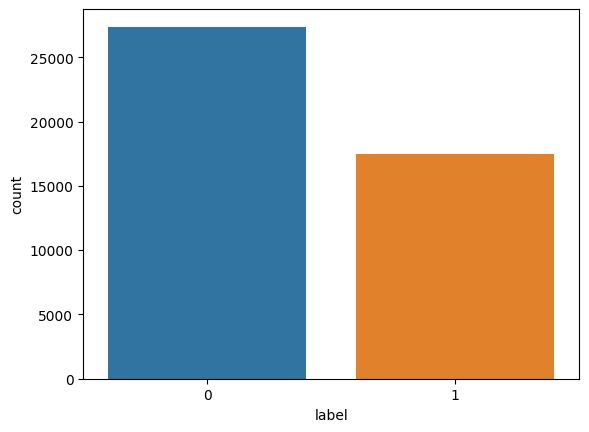

In [9]:
sns.countplot(x=df_train_essay_ex['label'])
plt.show

In [10]:
# sns.countplot(x=df_train_essay_ex2['label'])
# plt.show

In [11]:
# df_train = pd.concat([df_train_essay_ex[["text", "label"]],
#                                    df_train_essay_ex2[["text", "label"]]])
# df_train = pd.concat([df_train_essay_ex[["text", "label"]],
#                                    train_ex[["text", "label"]]])
df_train = df_train_essay_ex[["text", "label"]]
df_train

,text,label
0,PhonesModern humans today are always on their ...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devicesToday...,0
3,Phones & DrivingDrivers should not be able to ...,0
4,Cell Phone Operation While DrivingThe ability ...,0
...,...,...
44863,"Dear Senator,I am writing to you today to expr...",1
44864,"Dear Senator,I am writing to you today to expr...",1
44865,"Dear Senator,I am writing to you today to expr...",1
44866,"Dear Senator,I am writing to you today to expr...",1


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44868 non-null  object
 1   label   44868 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.2+ KB


In [13]:
df_train['label'].value_counts()

label
0    27371
1    17497
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

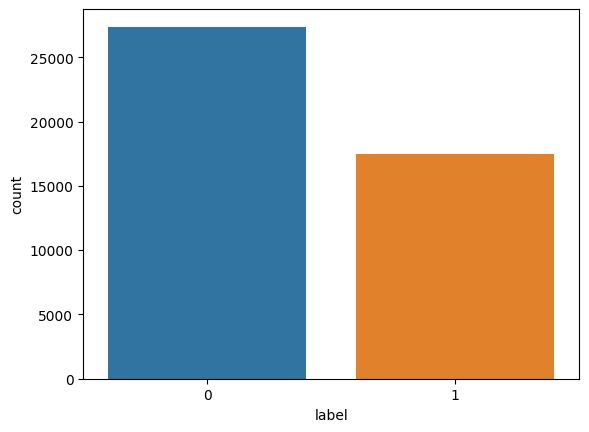

In [14]:
sns.countplot(x=df_train['label'])
plt.show

In [15]:
# # Function to balance label counts
# def undersample(df, label_column='generated'):
#     label_counts = df[label_column].value_counts()
#     min_count = label_counts.min()

#     balanced_df = pd.DataFrame()

#     for label, count in label_counts.items():
#         label_subset = df[df[label_column] == label]
#         undersampled_subset = label_subset.sample(n=min_count, random_state=42)
#         balanced_df = pd.concat([balanced_df, undersampled_subset], ignore_index=True)

#     return balanced_df

# # Balance labels in the DataFrame
# df_balanced_train = undersample(df_train)

# Print the balanced DataFrame
# print(df_balanced_train)

<function matplotlib.pyplot.show(close=None, block=None)>

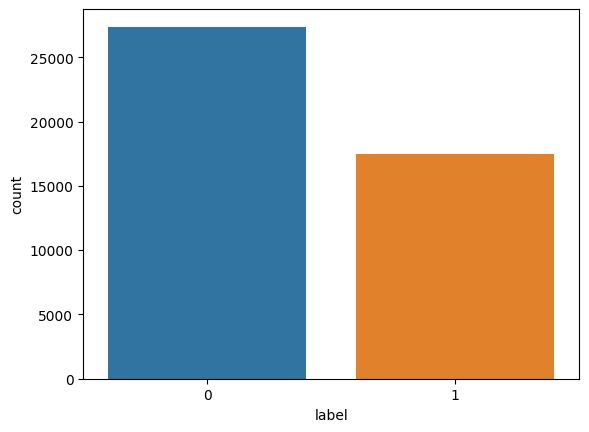

In [16]:
sns.countplot(x=df_train['label'])
plt.show

In [17]:
df_train["text_len"] = df_train["text"].apply(lambda x : len(x.split()))

/tmp/ipykernel_26/2420977747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["text_len"] = df_train["text"].apply(lambda x : len(x.split()))


In [18]:
df_train

,text,label,text_len
0,PhonesModern humans today are always on their ...,0,374
1,This essay will explain if drivers should or s...,0,362
2,Driving while the use of cellular devicesToday...,0,176
3,Phones & DrivingDrivers should not be able to ...,0,208
4,Cell Phone Operation While DrivingThe ability ...,0,328
...,...,...,...
44863,"Dear Senator,I am writing to you today to expr...",1,372
44864,"Dear Senator,I am writing to you today to expr...",1,341
44865,"Dear Senator,I am writing to you today to expr...",1,267
44866,"Dear Senator,I am writing to you today to expr...",1,246


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


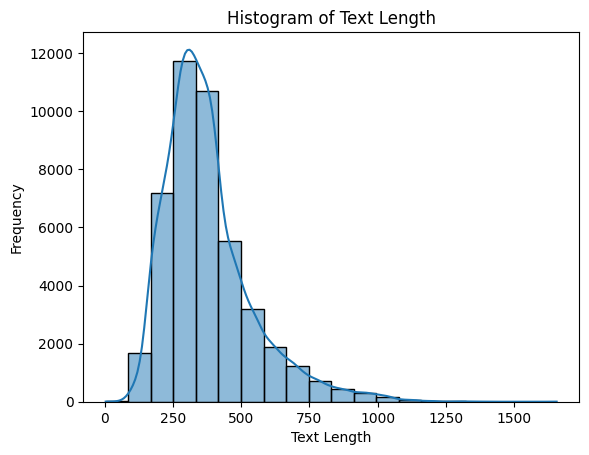

In [19]:
sns.histplot(df_train['text_len'], bins=20, kde=True)
plt.title('Histogram of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [20]:
print(df_train["text_len"].mean())
print(df_train["text_len"].max())

379.1882633502719
1656


avg(len)<512 = OK

## Data pre-process

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# nltk.download('stopwords')
# nltk.download('punkt')

def remove_stopwords(input_text, language='english'):
    """
    Remove stopwords from the input text.

    Parameters:
    - input_text (str): The input text containing stopwords.
    - language (str): The language of the stopwords. Default is 'english'.

    Returns:
    - str: The cleaned text without stopwords.
    """
    # Tokenize the text
    words = word_tokenize(input_text['text'])
    
    print(f"Index {input_text['index_col']}") if input_text['index_col'] % 10000 == 0 else None

#     Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stopwords.words(language)]

    # Join the filtered words to form the cleaned text
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

In [22]:
# df_balanced_train['index_col'] = df_balanced_train.index
# df_balanced_train["text"] = df_balanced_train.apply(lambda text: remove_stopwords(text), axis=1)

df_train['index_col'] = df_train.index
df_train['text'] = df_train.apply(lambda text: remove_stopwords(text), axis=1)

df_test_essay['index_col'] = df_test_essay.index
df_test_essay["text"] = df_test_essay.apply(lambda text: remove_stopwords(text), axis=1)

/tmp/ipykernel_26/4145976751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['index_col'] = df_train.index


Index 0
Index 10000
Index 20000
Index 30000
Index 40000
Index 0


/tmp/ipykernel_26/4145976751.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text'] = df_train.apply(lambda text: remove_stopwords(text), axis=1)


### Split

In [23]:
from sklearn.model_selection import train_test_split

x, y = df_train['text'], df_train['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)


# Model

In [24]:
# Import libraries
from transformers import BertForSequenceClassification, AdamW, BertConfig,BertTokenizer,get_linear_schedule_with_warmup
import tensorflow as tf
import tensorflow_text as text
import tensorflow_hub as hub


In [25]:
model_path = "/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-128-a-2/2"
preprocess_path = "/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/"

In [26]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(preprocess_path)
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    model_path,
    trainable=True)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 512].
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 512].
dense_1 = tf.keras.layers.Dense(128 , activation='relu')(pooled_output)
dropout = tf.keras.layers.Dropout(0.7 , name="dropout1")(pooled_output)
dense_2 = tf.keras.layers.Dense(64 , activation='relu')(dropout)
dropout = tf.keras.layers.Dropout(0.5 , name="dropout2")(dense_2)

dense_out = tf.keras.layers.Dense(1 , activation='sigmoid', name='output')(dropout)


model = tf.keras.Model(inputs=text_input, outputs=dense_out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['input_1[0][0]']             
                             128),                                                                
                              'input_word_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [27]:
# https://huggingface.co/google/bert_uncased_L-12_H-128_A-2
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss='binary_crossentropy',
              metrics=["acc"])

checkpoint_filepath = 'checkpoint.hdf5'
metric = 'val_accuracy'
callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, 
                                                    monitor=metric,
                                                    verbose=2,
                                                    save_best_only=True,
                                                    mode='max'), 
                 tf.keras.callbacks.EarlyStopping(monitor=metric,
                                                  patience=0,
                                                  restore_best_weights=True)
                ]
history = model.fit(x_train, y_train , batch_size=8, callbacks=[callback_list],
                    epochs=5 , validation_data=(x_test, y_test))
# model.load_weights(checkpoint_filepath)
model.save("model-bert")

Epoch 1/5
4487/4487 [==============================] - 372s 73ms/step - loss: 0.1925 - acc: 0.9230 - val_loss: 0.0531 - val_acc: 0.9831
Epoch 2/5
4487/4487 [==============================] - 287s 64ms/step - loss: 0.0518 - acc: 0.9853 - val_loss: 0.1359 - val_acc: 0.9780
Epoch 3/5
4487/4487 [==============================] - 286s 64ms/step - loss: 0.0305 - acc: 0.9912 - val_loss: 0.0790 - val_acc: 0.9715
Epoch 4/5
4487/4487 [==============================] - 286s 64ms/step - loss: 0.0195 - acc: 0.9946 - val_loss: 0.0402 - val_acc: 0.9919
Epoch 5/5
4487/4487 [==============================] - 287s 64ms/step - loss: 0.0135 - acc: 0.9961 - val_loss: 0.0380 - val_acc: 0.9919


# Test

In [28]:
loss , acc = model.evaluate(x_train, y_train)
print("Accuracy on Train data:",acc)
loss , acc = model.evaluate(x_test, y_test)
print("Accuracy on Test data:",acc)

1122/1122 [==============================] - 95s 84ms/step - loss: 0.0035 - acc: 0.9991
Accuracy on Train data: 0.9990805983543396
281/281 [==============================] - 24s 85ms/step - loss: 0.0380 - acc: 0.9919
Accuracy on Test data: 0.9918653964996338


In [29]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

y_pred = model.predict(x_test)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
print(roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))


281/281 [==============================] - 24s 81ms/step
0.9906532700036536
[[5453   21]
 [  52 3448]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5474
           1       0.99      0.99      0.99      3500

    accuracy                           0.99      8974
   macro avg       0.99      0.99      0.99      8974
weighted avg       0.99      0.99      0.99      8974

0.9918653889012703
0.9851428571428571
0.9939463822427212
0.9914379910846377


In [30]:
for label in [0, 1]:  # Iterate through each of the two labels
    print(f'False predictions for label {label}:')
    # Find indices of false predictions for the current label
    false_pred_indices = [(index, y_p) for index, (y_t, y_p) in enumerate(zip(y_test, y_pred)) if y_t == label and y_p != y_t]
    # Print the input text for these false predictions along with their predicted and actual labels
    for index, pred_label in false_pred_indices[:5]:  # Limiting to first 5 false predictions for brevity
        print(f"Index:  {index}")
        print(f"Predicted Label: {pred_label}, Actual Label: {label}")
        print(f"Text: {df_train.iloc[index]['text']}")
    print()  # Add a newline for better readability between labels

False predictions for label 0:
Index:  132
Predicted Label: 1, Actual Label: 0
Text: Phones play key role people keeping touch one another accomplishing daily goals reminders hand . Driving complex task requires full undivided attention , reason phone use driving illegal . reality , make exception certain situations comes phone use driving . exceptions include emergencies whether family work related , life death situations . GPS people efficiently effectively get unfamiliar destinations . Also , people use phones agendas set daily reminders goals accomplish daily.Therefore , people able use phones driving.Cellular devices used many things vehicle emergency calls . calls may work related call job . example , call doctor would need phone matter circumstances hospital needs . emergencies like child calling he/she stranded somewhere . Phones may needed types emergencies.While driving vehicles , many use cell phones gps . Gps used getting unknown locations . used get unknown places , many a

In [31]:
y_pred = model.predict(df_test_essay['text'])
y_pred

1/1 [==============================] - 0s 52ms/step


array([[9.9999762e-01],
       [1.9224342e-05],
       [1.7257524e-05]], dtype=float32)

In [32]:
submission_data = {'id': df_test_essay['id'], 'generated': y_pred[:, 0]}
submission = pd.DataFrame(submission_data)

# Save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

In [33]:
pd.read_csv("/kaggle/working/submission.csv")

,id,generated
0,0000aaaa,0.999998
1,1111bbbb,0.000019
2,2222cccc,0.000017


In [34]:
print('done')

done
